In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [68]:
df = pd.read_csv("wine.csv",index_col=0)
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


In [70]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [71]:
df.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

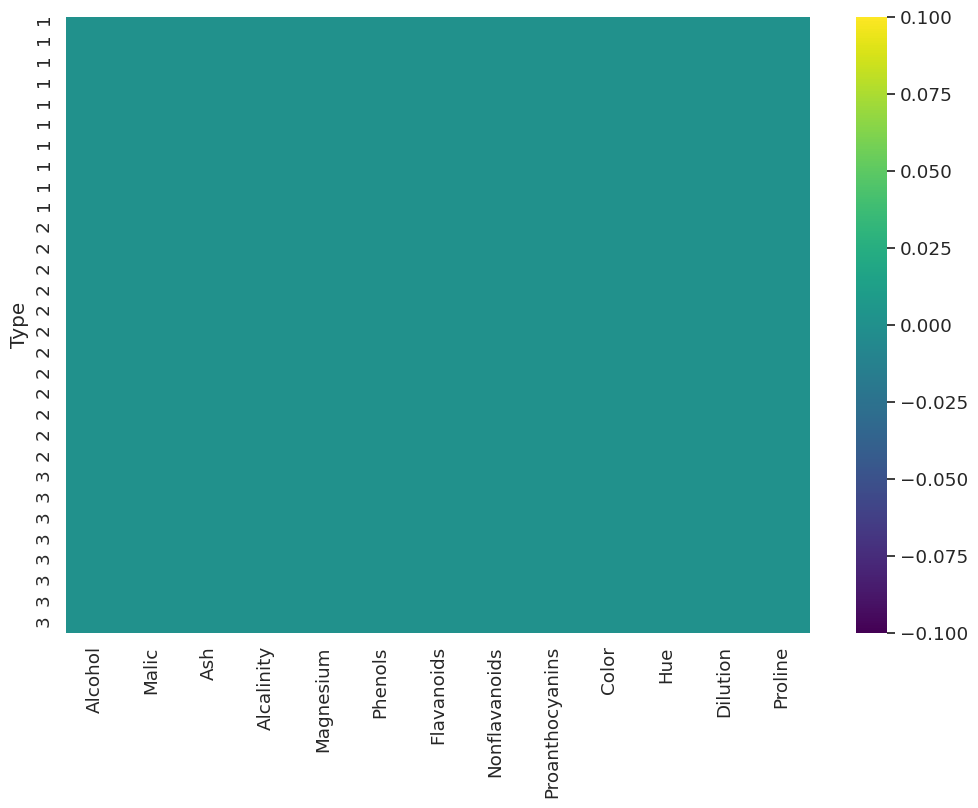

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis');

In [73]:
df.duplicated().sum()

0

In [74]:
df.duplicated()

Type
1    False
1    False
1    False
1    False
1    False
     ...  
3    False
3    False
3    False
3    False
3    False
Length: 178, dtype: bool

In [75]:
df[df.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,


In [76]:
df['Alcohol'].values

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
       13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
       13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
       14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
       13.74, 13.56, 14.22, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67,
       12.37, 12.17, 12.37, 13.11, 12.37, 13.34, 12.21, 12.29, 13.86,
       13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.33, 12.7 , 12.  ,
       12.72, 12.08, 13.05, 11.84, 12.67, 12.16, 11.65, 11.64, 12.08,
       12.08, 12.  , 12.69, 12.29, 11.62, 12.47, 11.81, 12.29, 12.37,
       12.29, 12.08, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.72,
       12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 12.08, 11.03, 11.82,
       12.42, 12.77, 12.  , 11.45, 11.56, 12.42, 13.05, 11.87, 12.07,
       12.43, 11.79,

In [77]:
df.Alcohol.unique()

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.4 , 12.2 , 14.16, 13.27, 14.13])

In [78]:
df.Alcohol.value_counts()

13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: Alcohol, Length: 126, dtype: int64

In [79]:
df1 = df.drop('Alcohol',axis=1)

In [80]:
df1

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,
1,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...
3,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


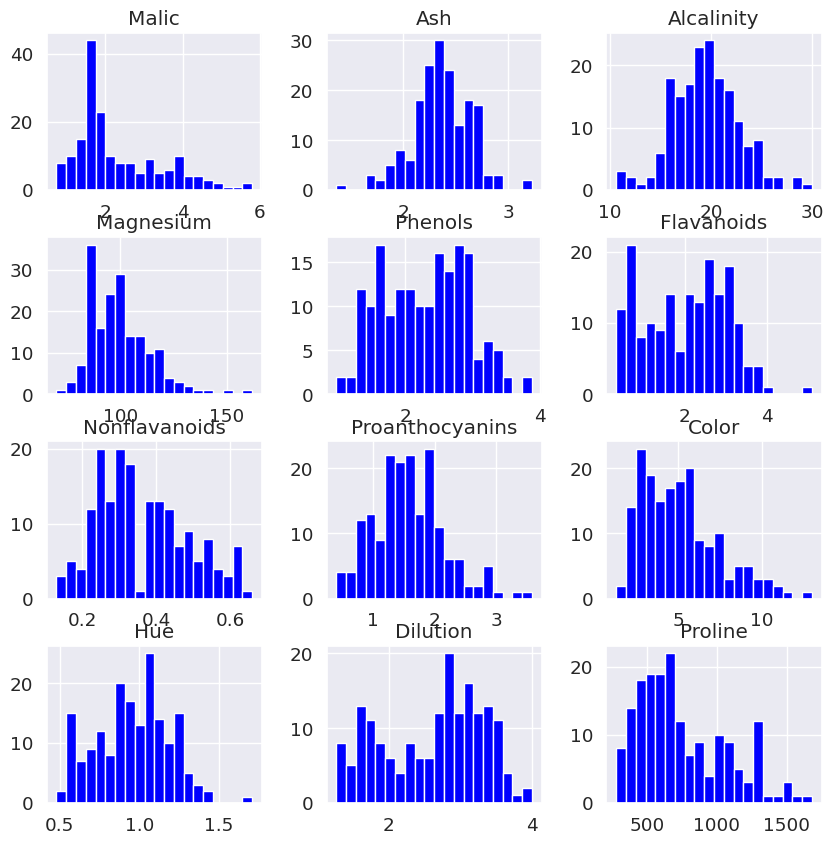

In [81]:
#EDA

sns.set(style='dark',font_scale=1.2, rc={'figure.figsize':(10,10)})
df2=df1.hist(bins=20,color='blue' )

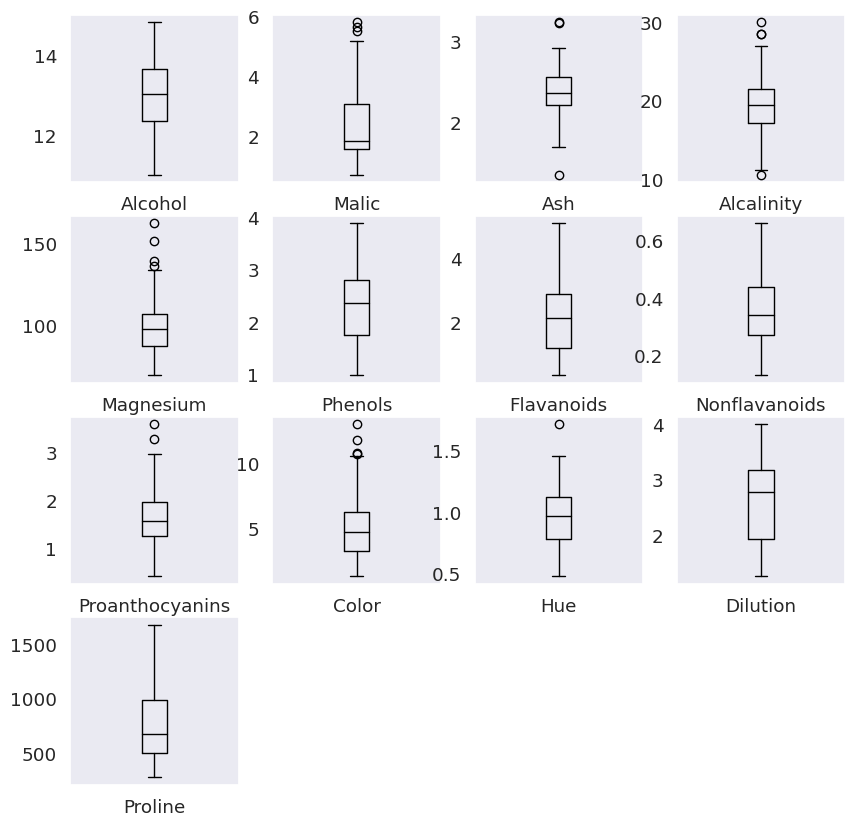

In [82]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

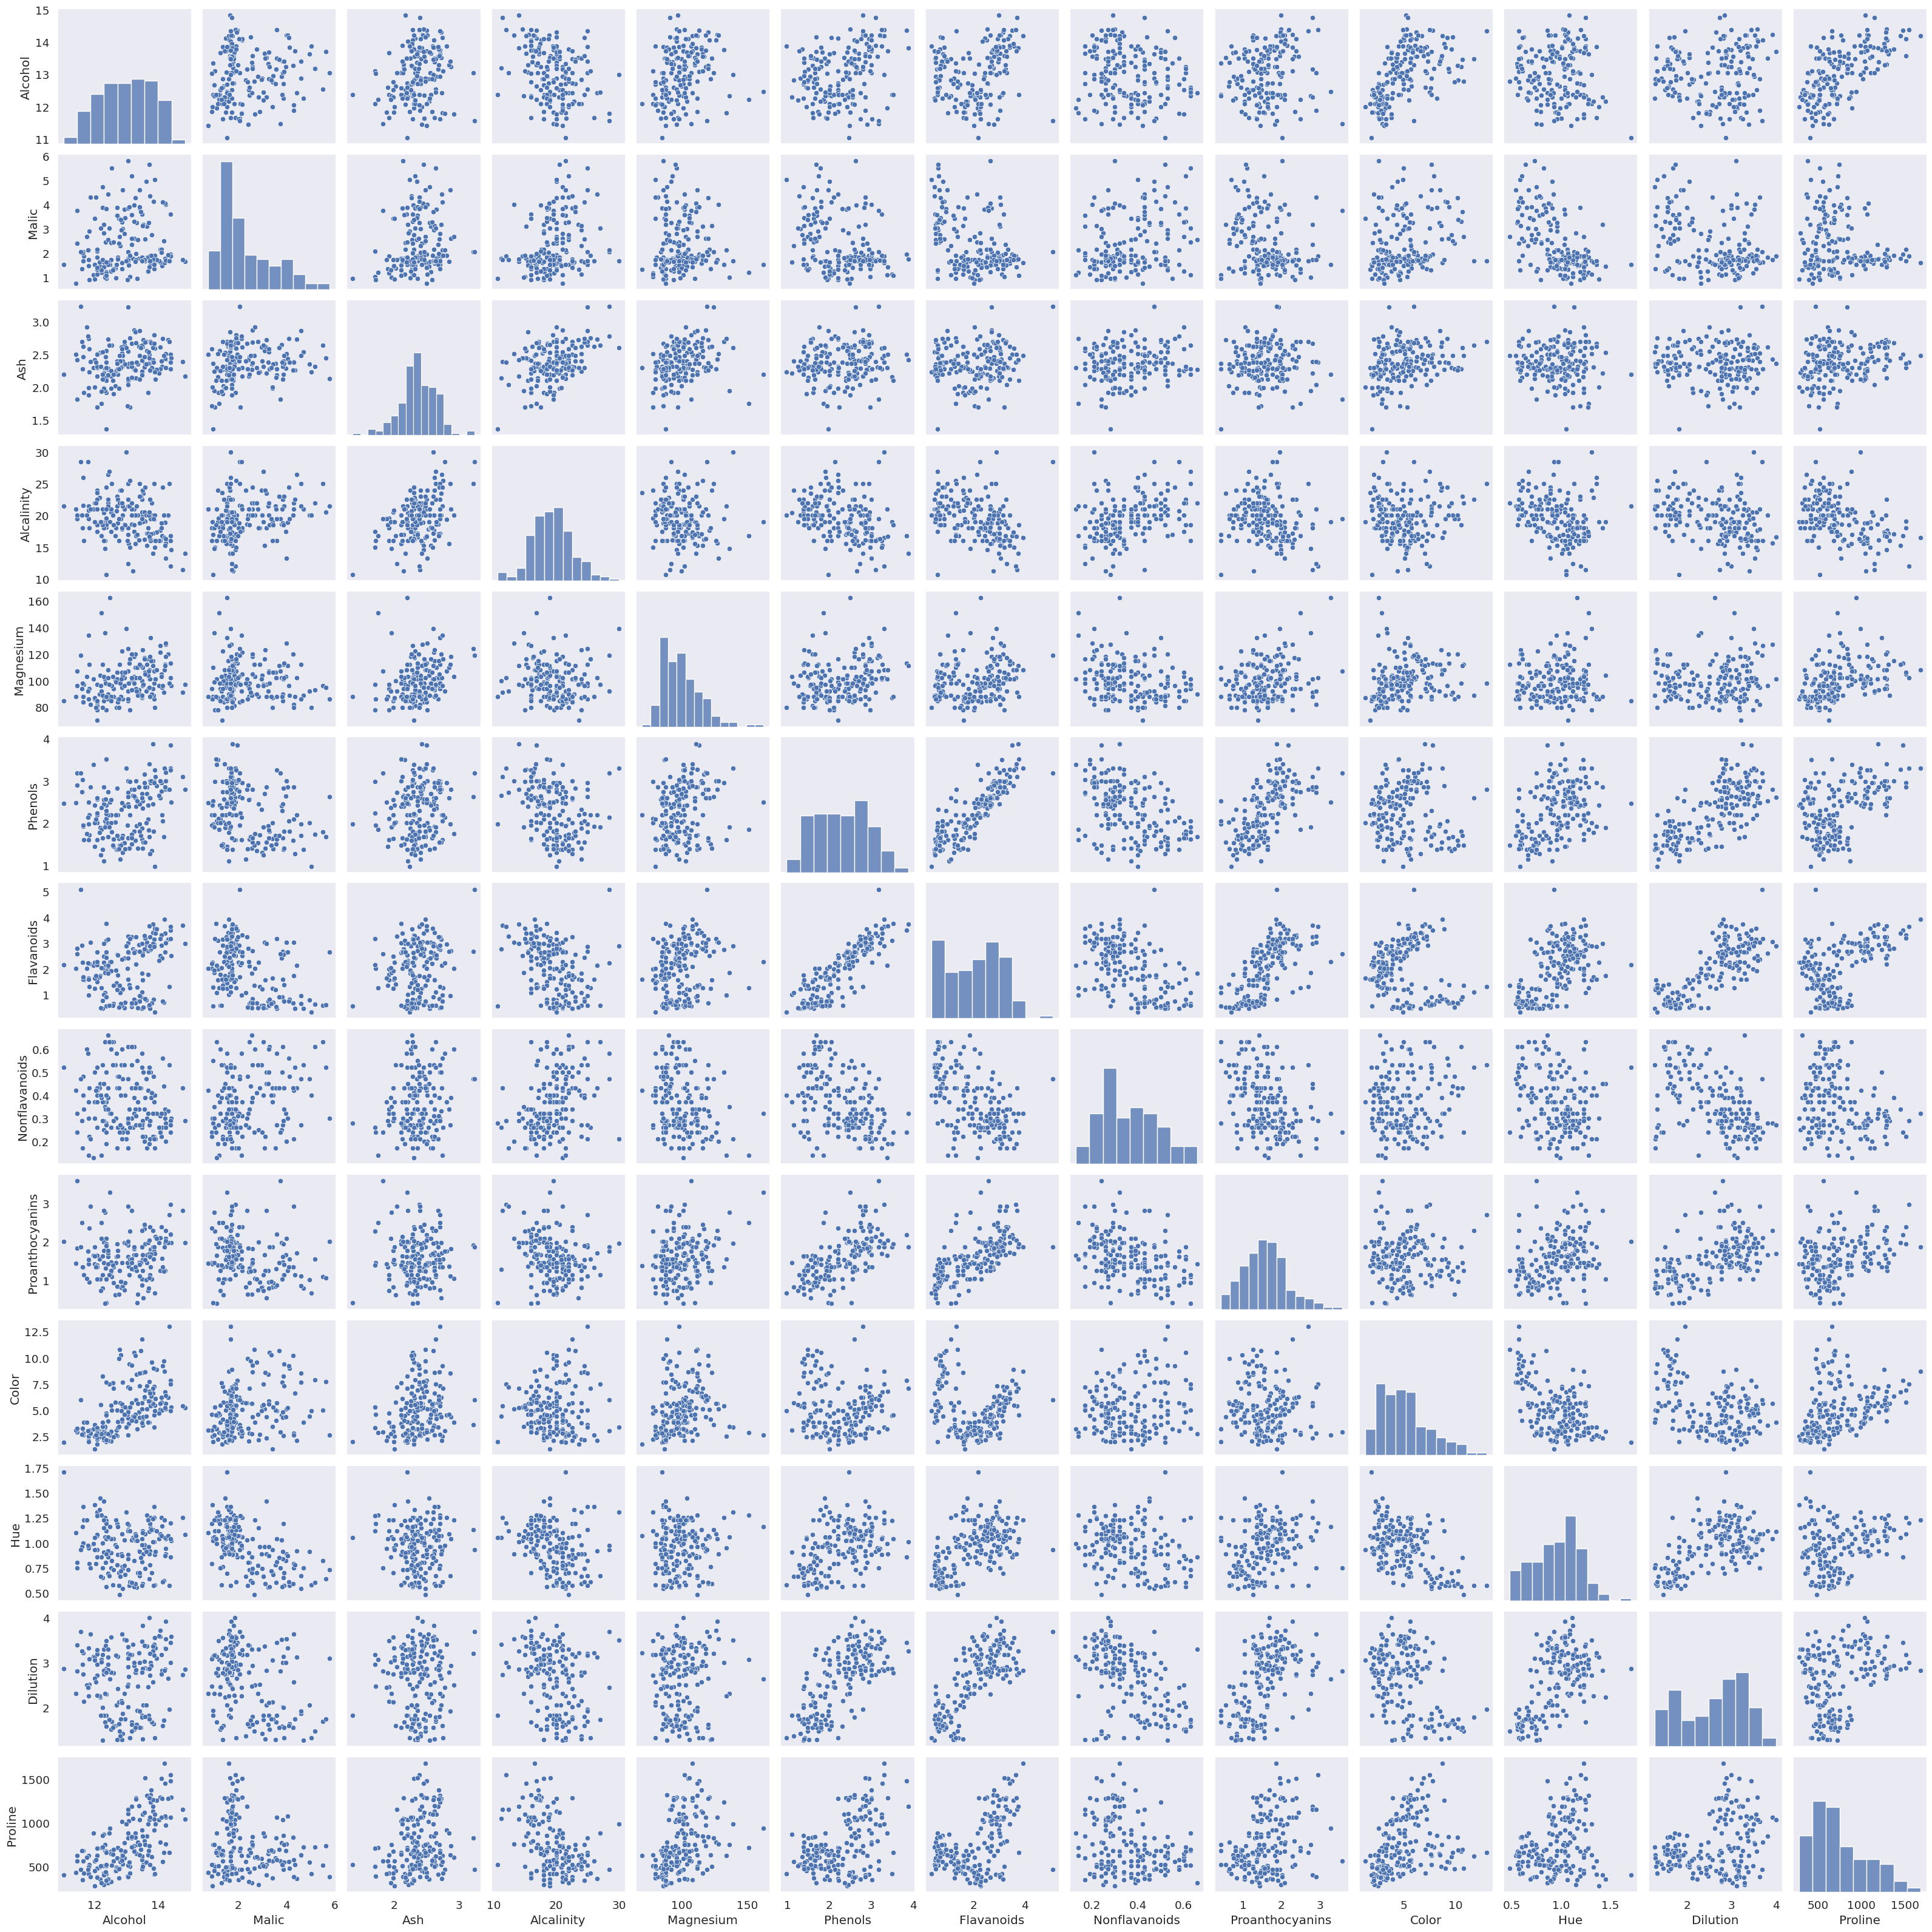

In [83]:
#visualization on data

sns.pairplot(df,palette="dark")

In [84]:
#correlation

df.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


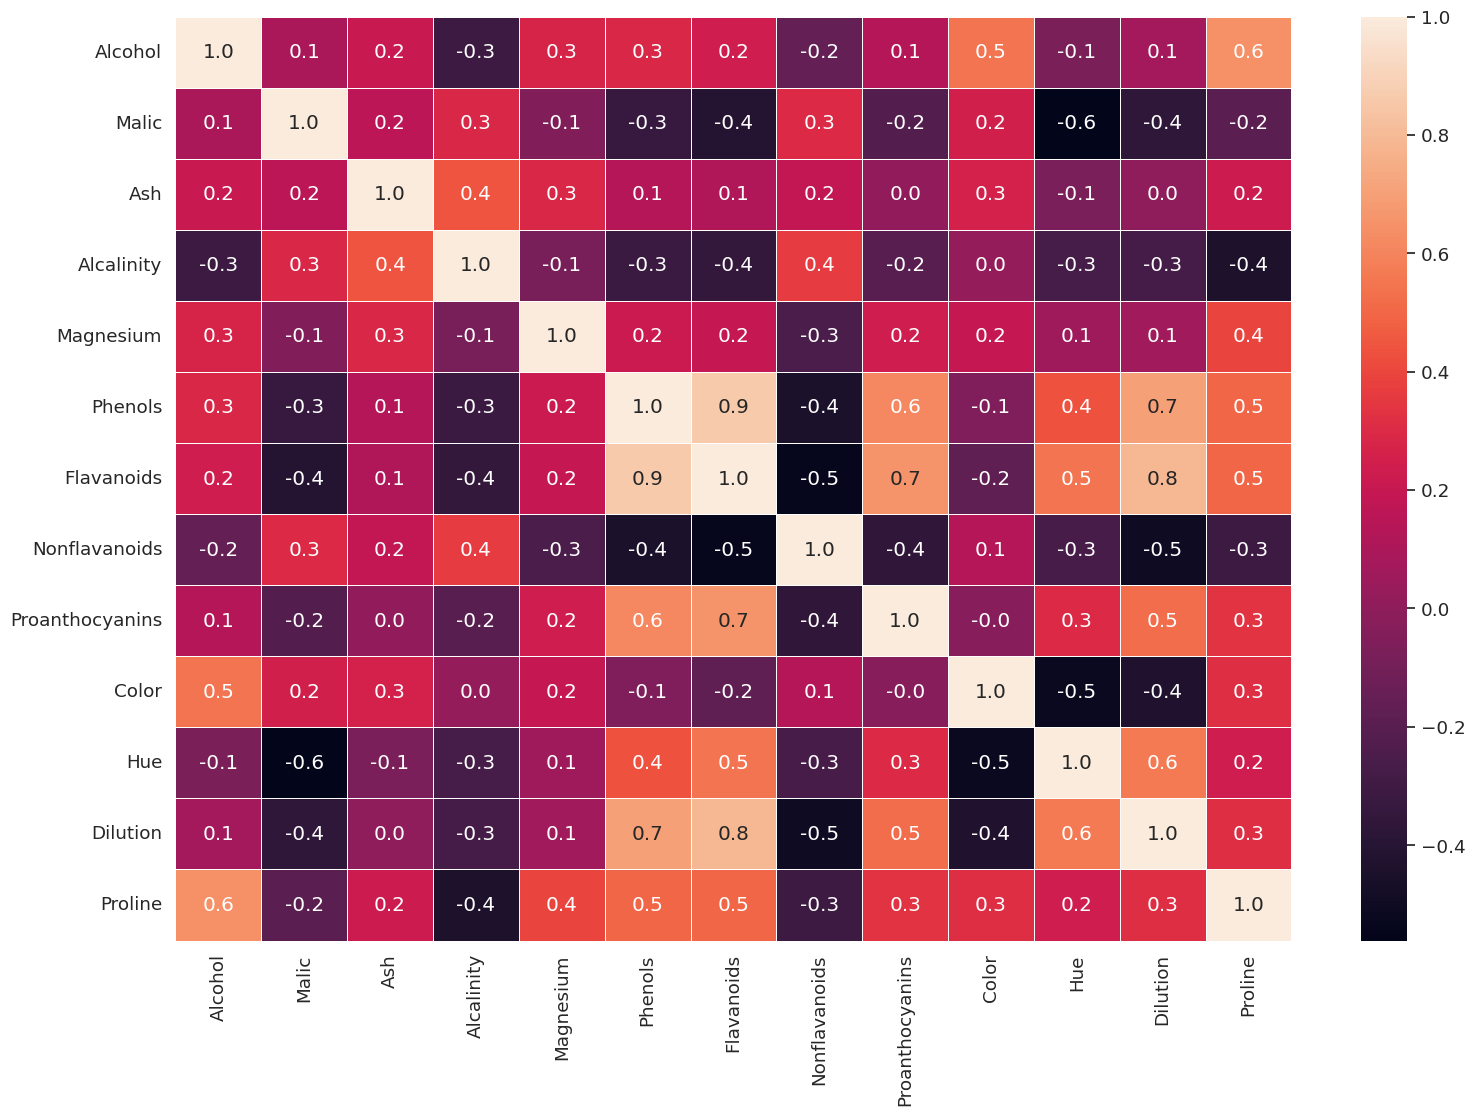

In [85]:
#correlation heatmap

f,df2 = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=df2)
plt.show()

HIERARCHICAL CLUSTERING AND DENDROGRAM



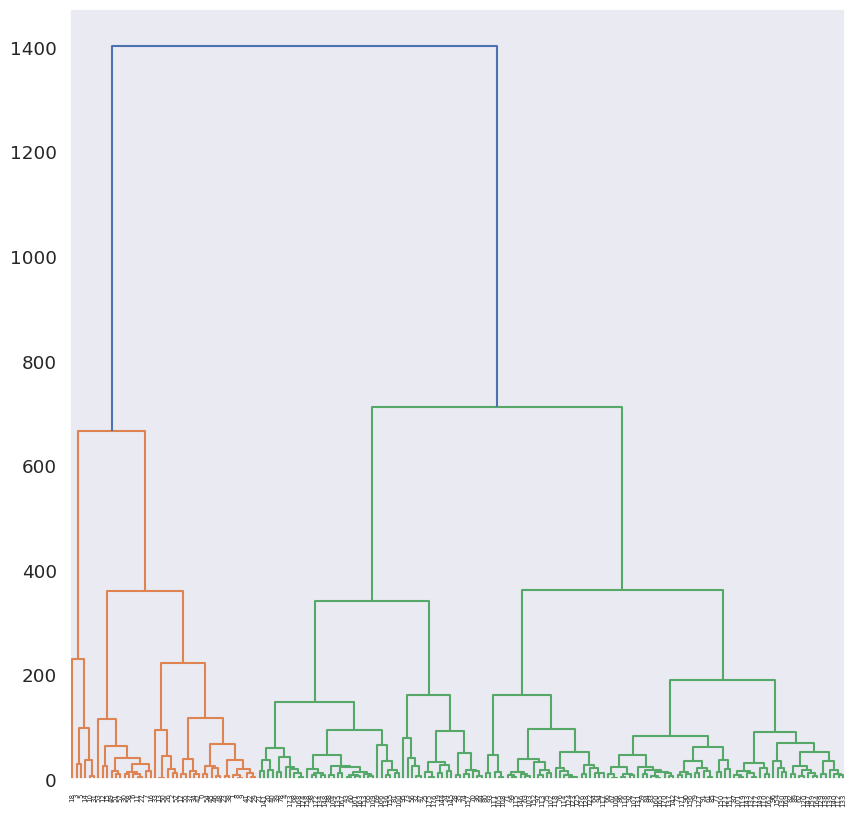

In [86]:

#create dendrogram

import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df,method='complete'))
plt.show()

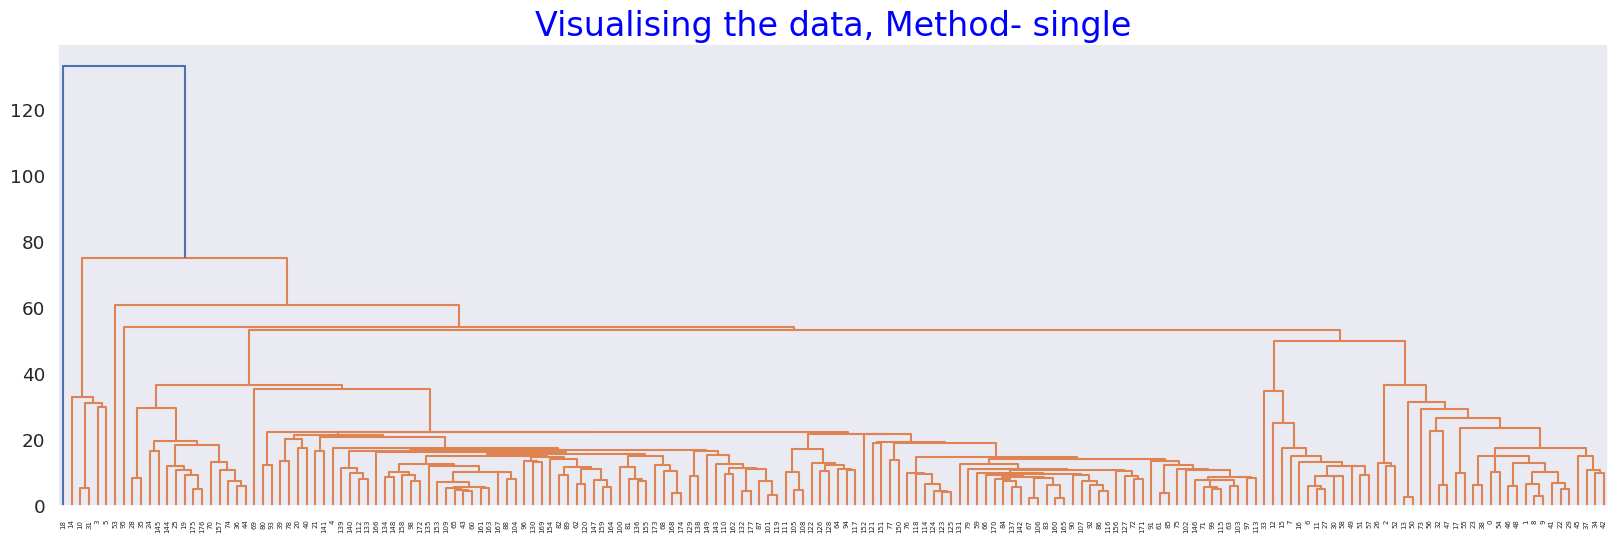

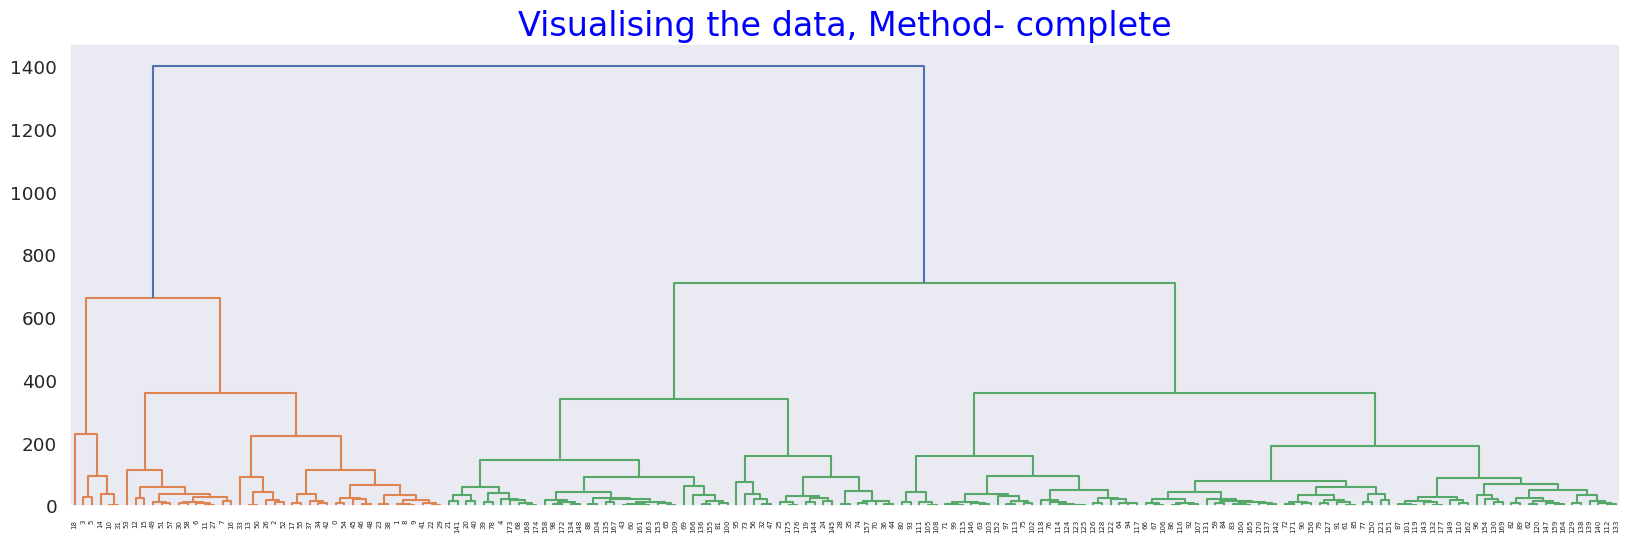

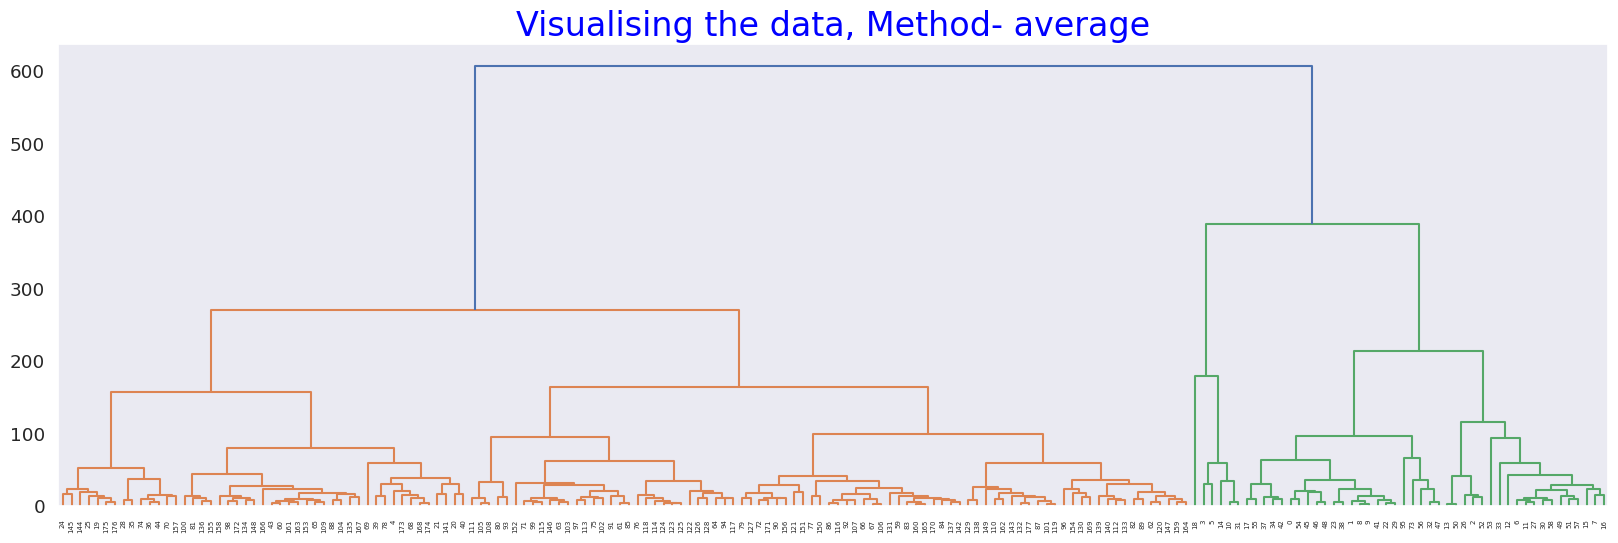

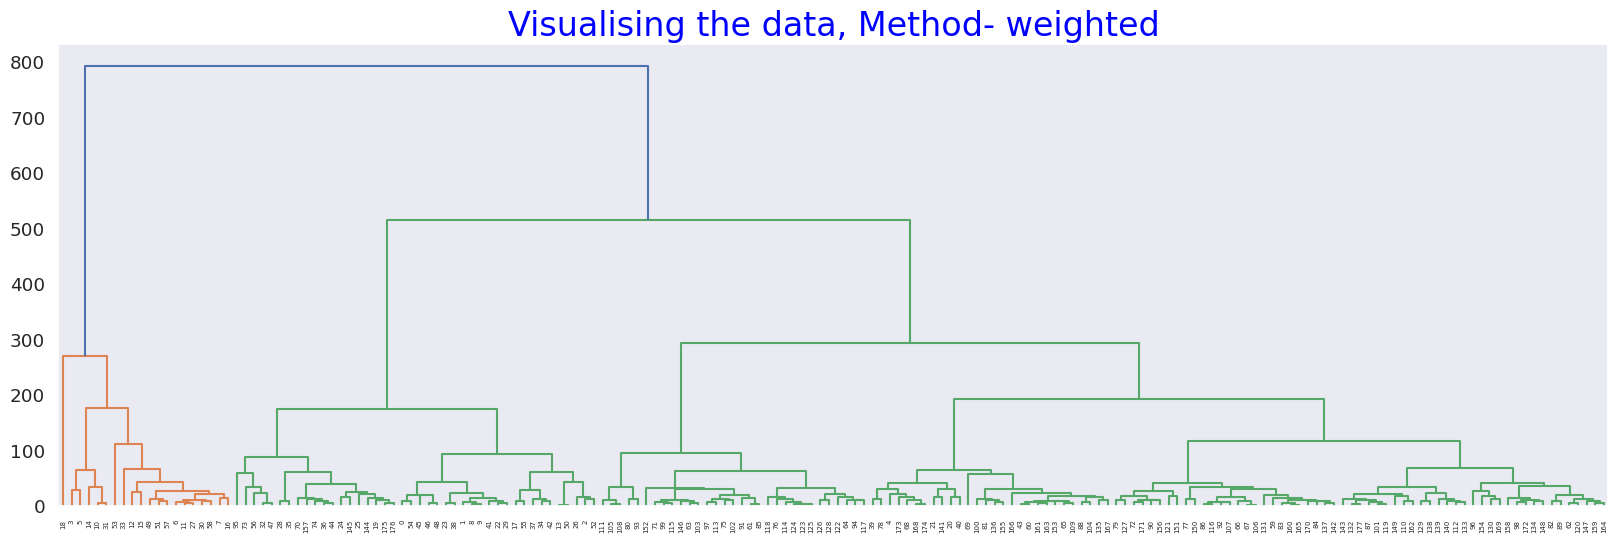

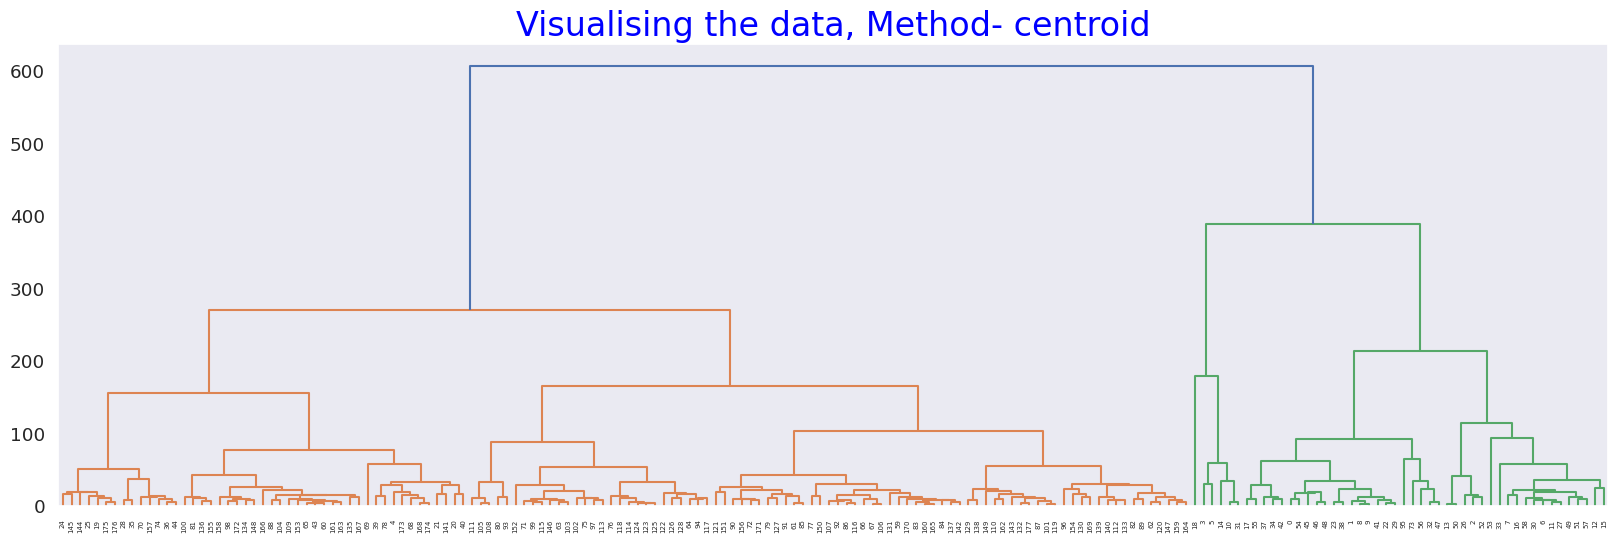

In [87]:
for methods in ['single','complete','average','weighted','centroid']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(df, method = methods,optimal_ordering=False))

In [88]:
#create cluster
from sklearn.cluster import AgglomerativeClustering

In [89]:
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'complete')
hc.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [90]:
yhc = hc.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [91]:
yhc

array([0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 3, 4, 4, 2,
       3, 3, 2, 2, 2, 4, 3, 2, 2, 4, 4, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 4, 4, 2, 3, 4, 2, 4, 2, 3, 4, 4, 2, 4, 3, 3, 4, 2,
       3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 4, 3, 2, 3, 3, 3, 4, 2,
       3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2,
       2, 3])

In [92]:
df['Alcohol'] = yhc

In [93]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
1,0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,0,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,1,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,2,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,2,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,2,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [94]:
df1 = df.sort_values("Alcohol")

In [95]:
df1[["Alcohol","Malic"]]

,Alcohol,Malic
Type,,
1,0,1.71
1,0,1.67
1,0,1.68
1,0,1.50
1,0,1.53
...,...,...
2,4,5.80
2,4,4.31
2,4,1.53


K-MEANS

In [96]:
from sklearn.cluster import KMeans

In [98]:
#inertia calculates the within cluster sum of squares
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.iloc[:,1:])
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [99]:
wcss

[17592179.72947644,
 4543668.256984161,
 2370619.8739895457,
 1331968.492520916,
 916313.1483654098,
 647260.2547716027,
 412071.2039842771,
 323144.53780985106,
 270077.31921425584,
 217870.54073482126]

<Axes: >

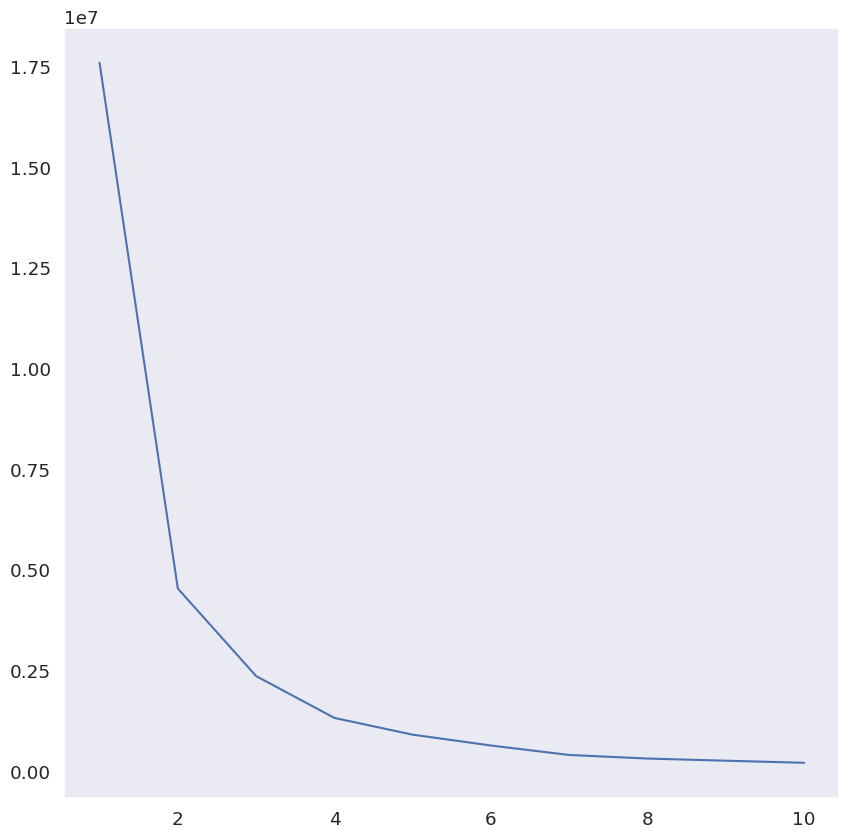

In [100]:
sns.lineplot(x=range(1,11),y=wcss)

In [101]:
from sklearn.metrics import silhouette_score

In [102]:
kmeans = KMeans(n_clusters=4)
predict = kmeans.fit_predict(df.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [103]:
predict

array([3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)